In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('tweets.csv', delimiter = ',')

In [14]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Tweet'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('indonesian')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:1000, 0].values

In [16]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## CrossValidation
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score,precision_score,f1_score

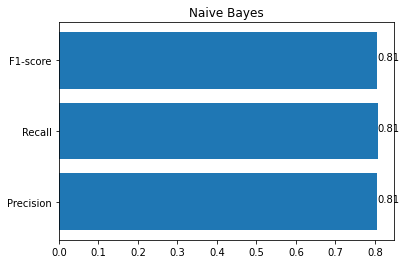

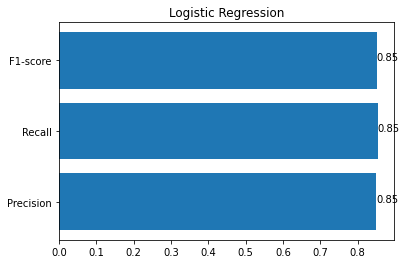

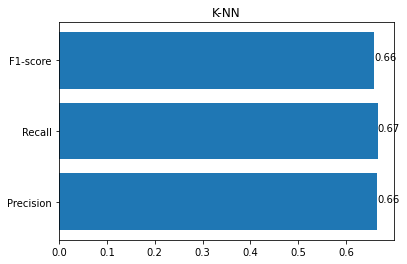

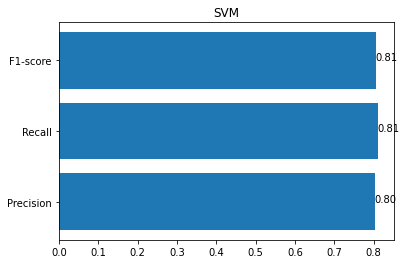

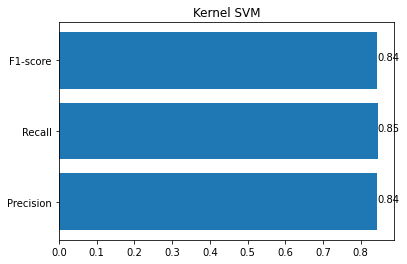

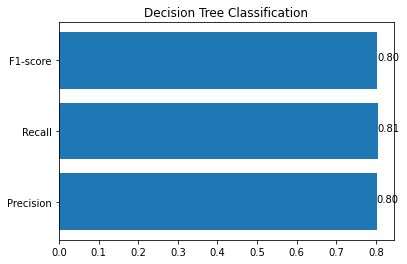

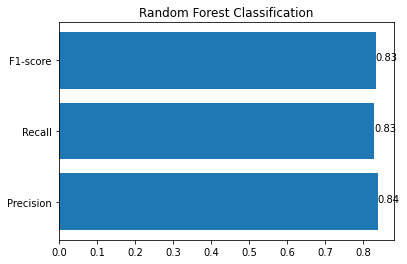

In [18]:
## Kodingan Semua
Select_model = ["Naive Bayes","Logistic Regression","K-NN","SVM","Kernel SVM","Decision Tree Classification","Random Forest Classification"]
scoring =['f1_macro','precision_macro','recall_macro']
for model in Select_model :
    if model == "Naive Bayes" :
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB()
#         classifier.fit(X_train, y_train)
    elif model == "Logistic Regression" :
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(random_state = 0)
#         classifier.fit(X_train, y_train)
    elif model == "K-NN" :
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
#         classifier.fit(X_train, y_train)
    elif model == "SVM" :
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'linear', random_state = 0)
#         classifier.fit(X_train, y_train)
    elif model == "Kernel SVM" :
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'rbf', random_state = 0)
#         classifier.fit(X_train, y_train)
    elif model == "Decision Tree Classification" :
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
#         classifier.fit(X_train, y_train)
    elif model == "Random Forest Classification" :
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
#         classifier.fit(X_train, y_train)
    title = model    
    ## TEs
    scores=cross_validate(classifier,X,y,cv=5,scoring=scoring)
    
    precision = scores['test_precision_macro'].mean()
    recall = scores['test_recall_macro'].mean()
    f1 = scores['test_f1_macro'].mean()
    
    labels = ['Precision','Recall','F1-score']
    values = [ precision, recall, f1]
    position = [0,1,2,3]
    plt.barh(labels,values)
    for index, value in enumerate(values):
        nilai = str(value)
        plt.text(value,index,str("{:.2f}".format(value)))
    plt.title(title)
    plt.show ()

